<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/ML_CONCEPTS_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Models

## 1. Linear Regression
Concept: Predicting a continuous value (like height) based on an in

Mean Squared Error: 0.65
Model Intercept (b0): 4.14
Model Coefficient (b1 for Age): 2.80


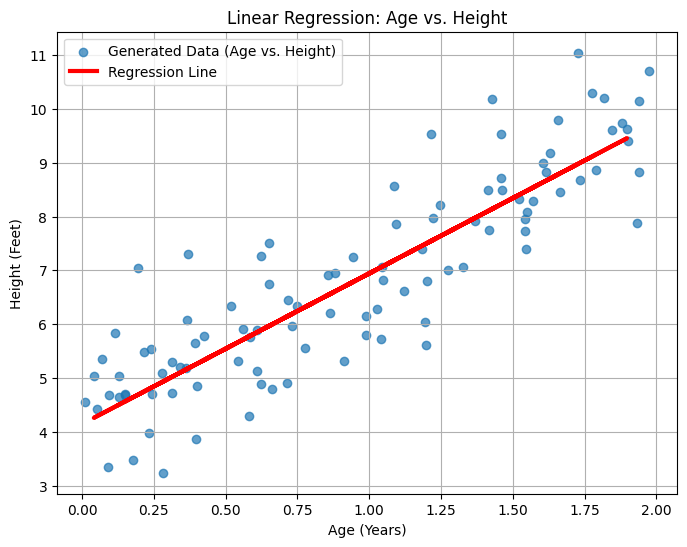


Predicted height for a 2.5-year-old: 11.14 feet


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate some synthetic data (like height over age)
# Let's say age is our feature (X) and height is our target (y)
np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1) # 100 random numbers between 0 and 2 (representing age)
y = 4 + 3 * X + np.random.randn(100, 1) # height = 4 + 3*age + some random noise

# 2. Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Generated Data (Age vs. Height)')
plt.xlabel("Age (Years)")
plt.ylabel("Height (Feet)")
plt.title("Linear Regression: Age vs. Height")
plt.grid(True)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a Linear Regression model
model = LinearRegression()

# 5. Train the model using the training data
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Intercept (b0): {model.intercept_[0]:.2f}")
print(f"Model Coefficient (b1 for Age): {model.coef_[0][0]:.2f}")

# 8. Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

# Example prediction: Predict height for a 2.5-year-old
new_age = np.array([[2.5]])
predicted_height = model.predict(new_age)
print(f"\nPredicted height for a 2.5-year-old: {predicted_height[0][0]:.2f} feet")

## 2. Logistic Regression
Concept: Predicting a binary outcome (like taking an umbrella or not)

Accuracy: 0.65


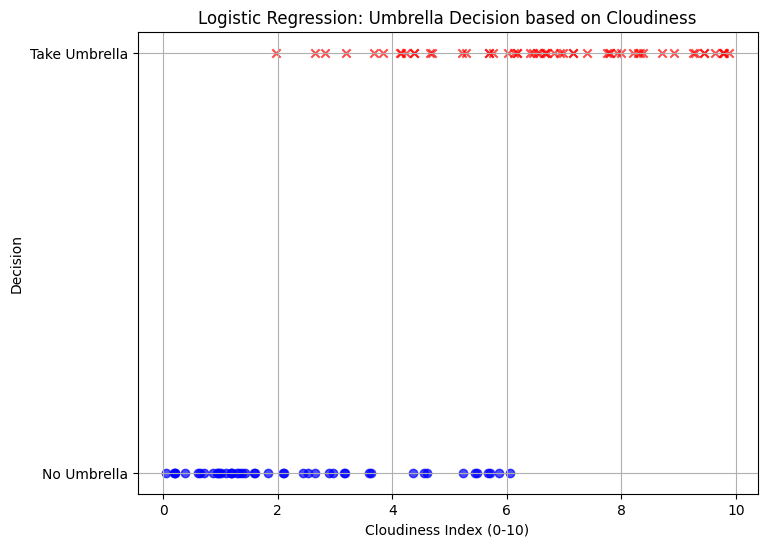

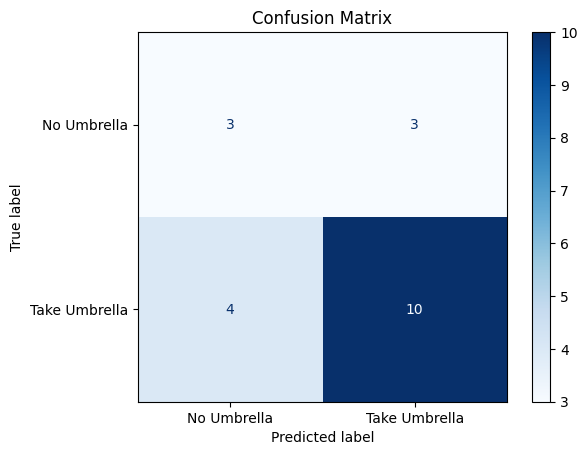

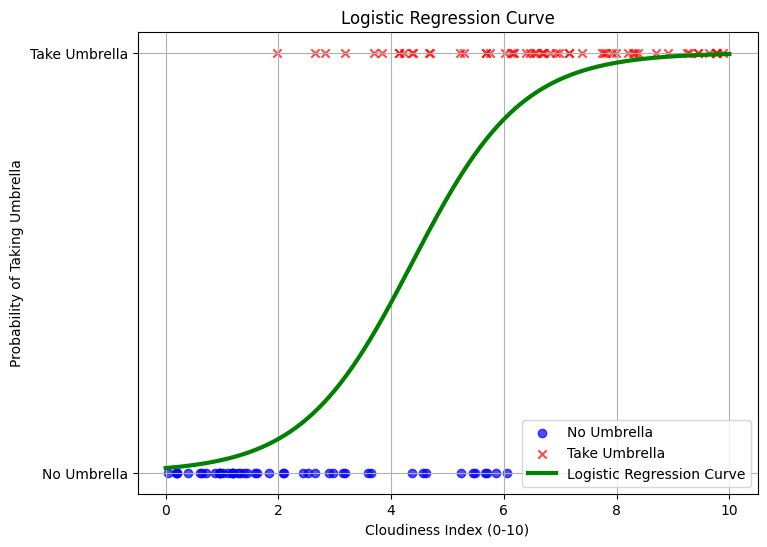


Probability of taking umbrella at cloudiness 6.0: 0.84
Decision for cloudiness 6.0: Take Umbrella


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Generate synthetic data (e.g., cloudiness vs. taking umbrella)
# X: Cloudiness (0 to 10), y: Take Umbrella (0=No, 1=Yes)
np.random.seed(0)
num_samples = 100
cloudiness = np.random.rand(num_samples, 1) * 10 # Cloudiness from 0 to 10

# Decision boundary around 5.0 cloudiness
# Add some noise to make it realistic
take_umbrella = (cloudiness + np.random.randn(num_samples, 1) * 2 > 5).astype(int)

# Combine for easier plotting
data_points = np.hstack((cloudiness, take_umbrella))

# 2. Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(cloudiness[take_umbrella == 0], np.zeros(np.sum(take_umbrella == 0)),
            color='blue', label='No Umbrella', marker='o', alpha=0.7)
plt.scatter(cloudiness[take_umbrella == 1], np.ones(np.sum(take_umbrella == 1)),
            color='red', label='Take Umbrella', marker='x', alpha=0.7)
plt.yticks([0, 1], ['No Umbrella', 'Take Umbrella'])
plt.xlabel("Cloudiness Index (0-10)")
plt.ylabel("Decision")
plt.title("Logistic Regression: Umbrella Decision based on Cloudiness")
plt.grid(True)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(cloudiness, take_umbrella.ravel(),
                                                    test_size=0.2, random_state=42)

# 4. Create Logistic Regression model
model = LogisticRegression()

# 5. Train the model
model.fit(X_train, y_train)

# 6. Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of taking umbrella
y_pred_class = model.predict(X_test) # Predicted class (0 or 1)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Umbrella', 'Take Umbrella'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Plot the logistic regression curve
x_vals = np.linspace(0, 10, 300).reshape(-1, 1)
y_proba = model.predict_proba(x_vals)[:, 1] # Probability of class 1

plt.figure(figsize=(8, 6))
plt.scatter(cloudiness[take_umbrella == 0], np.zeros(np.sum(take_umbrella == 0)),
            color='blue', label='No Umbrella', marker='o', alpha=0.7)
plt.scatter(cloudiness[take_umbrella == 1], np.ones(np.sum(take_umbrella == 1)),
            color='red', label='Take Umbrella', marker='x', alpha=0.7)
plt.plot(x_vals, y_proba, color='green', linewidth=3, label='Logistic Regression Curve')
plt.yticks([0, 1], ['No Umbrella', 'Take Umbrella'])
plt.xlabel("Cloudiness Index (0-10)")
plt.ylabel("Probability of Taking Umbrella")
plt.title("Logistic Regression Curve")
plt.grid(True)
plt.legend()
plt.show()

# Example prediction: Probability of taking umbrella at cloudiness 6.0
new_cloudiness = np.array([[6.0]])
predicted_proba = model.predict_proba(new_cloudiness)[0, 1]
predicted_class = model.predict(new_cloudiness)[0]
print(f"\nProbability of taking umbrella at cloudiness 6.0: {predicted_proba:.2f}")
print(f"Decision for cloudiness 6.0: {'Take Umbrella' if predicted_class == 1 else 'No Umbrella'}")

# Decision-Making

## 1. Decision Trees
Concept: A flowchart for decisions.

Decision Tree Accuracy: 1.00


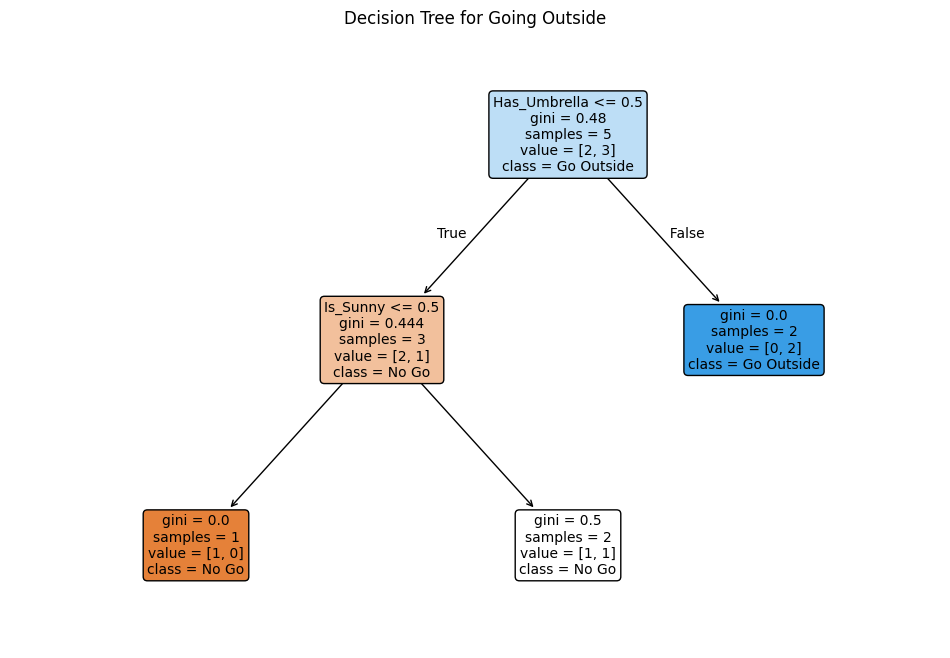


Prediction for (Raining:1, Umbrella:1, Sunny:0): Go Outside


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Create a synthetic dataset (like our "Choose Your Own Adventure" book)
# Features: Is_Raining, Has_Umbrella, Is_Sunny
# Target: Go_Outside (Yes/No)
data = {
    'Is_Raining': [1, 1, 0, 0, 1, 0, 1, 0],
    'Has_Umbrella': [1, 0, 1, 0, 1, 1, 0, 0],
    'Is_Sunny':     [0, 0, 1, 1, 0, 1, 0, 1],
    'Go_Outside':   ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)

# Convert categorical target to numerical
df['Go_Outside'] = df['Go_Outside'].map({'No': 0, 'Yes': 1})

X = df[['Is_Raining', 'Has_Umbrella', 'Is_Sunny']]
y = df['Go_Outside']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create Decision Tree Classifier model
# max_depth limits the tree size for better visualization
model = DecisionTreeClassifier(random_state=42, max_depth=3)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# 7. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=['No Go', 'Go Outside'],
          filled=True, rounded=True,
          fontsize=10)
plt.title("Decision Tree for Going Outside")
plt.show()

# Example prediction: Is it raining (1), do I have an umbrella (1), is it sunny (0)?
new_situation = pd.DataFrame([[1, 1, 0]], columns=X.columns)
prediction = model.predict(new_situation)[0]
print(f"\nPrediction for (Raining:1, Umbrella:1, Sunny:0): {'Go Outside' if prediction == 1 else 'Do Not Go Outside'}")

## 2 Random Forests
Concept: An ensemble of many Decision Trees.

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a larger synthetic dataset (more complex 'Go Outside' scenario)
np.random.seed(42)
data_size = 200
df_rf = pd.DataFrame({
    'Temperature': np.random.uniform(10, 35, data_size), # Celsius
    'Humidity': np.random.uniform(30, 95, data_size), # Percentage
    'Wind_Speed': np.random.uniform(0, 30, data_size), # km/h
    'Is_Weekend': np.random.randint(0, 2, data_size) # 0=Weekday, 1=Weekend
})

# Define a more complex logic for 'Go_Outside'
# For example: Warm, low humidity, low wind, or weekend and not too windy
df_rf['Go_Outside'] = ((df_rf['Temperature'] > 20) & (df_rf['Humidity'] < 70) & (df_rf['Wind_Speed'] < 15)) | \
                      ((df_rf['Is_Weekend'] == 1) & (df_rf['Wind_Speed'] < 20)).astype(int)

X_rf = df_rf[['Temperature', 'Humidity', 'Wind_Speed', 'Is_Weekend']]
y_rf = df_rf['Go_Outside']

# 2. Split data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# 3. Create Random Forest Classifier model
# n_estimators: number of trees in the forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. Train the model
model_rf.fit(X_train_rf, y_train_rf)

# 5. Make predictions
y_pred_rf = model_rf.predict(X_test_rf)

# 6. Evaluate
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Feature importance (a nice bonus from Random Forests)
feature_importances = pd.Series(model_rf.feature_importances_, index=X_rf.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Example prediction: Warm, low humidity, low wind, not weekend
new_weather = pd.DataFrame([[25, 50, 10, 0]], columns=X_rf.columns)
prediction_rf = model_rf.predict(new_weather)[0]
print(f"\nPrediction for (Temp:25, Hum:50, Wind:10, Weekend:0): {'Go Outside' if prediction_rf == 1 else 'Do Not Go Outside'}")

Random Forest Accuracy: 0.98

Feature Importances:
Wind_Speed     0.521397
Is_Weekend     0.236270
Temperature    0.155717
Humidity       0.086616
dtype: float64

Prediction for (Temp:25, Hum:50, Wind:10, Weekend:0): Go Outside


# Clustering & Classification

## 1. K-Means Clustering
Concept: Grouping similar items (LEGOs by color). Note: K-Means is an unsupervised learning algorithm, meaning it doesn't use pre-defined labels.

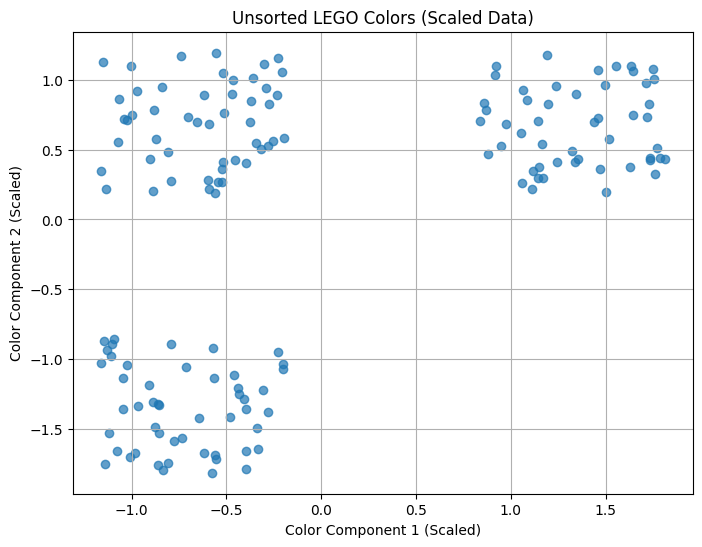

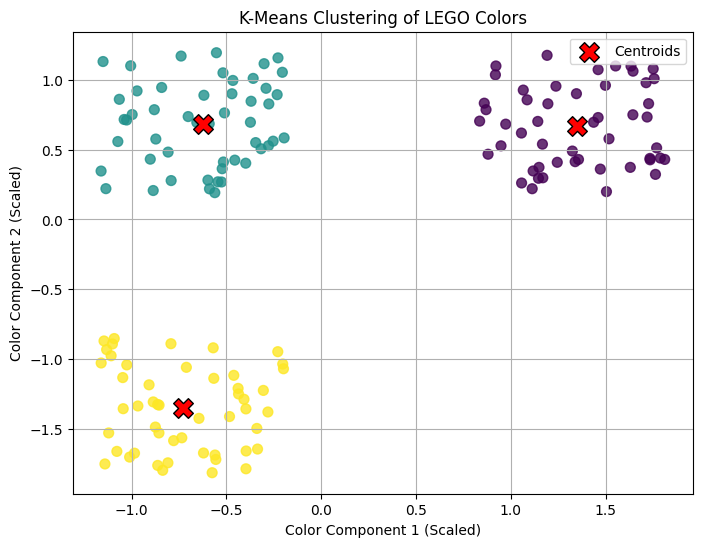

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic LEGO data (e.g., RGB color values)
# Let's create 3 clusters of "colors"
np.random.seed(42)
cluster1 = np.random.rand(50, 2) * 2 + [1, 1] # Red-ish LEGOs
cluster2 = np.random.rand(50, 2) * 2 + [5, 5] # Blue-ish LEGOs
cluster3 = np.random.rand(50, 2) * 2 + [1, 5] # Green-ish LEGOs
lego_colors = np.vstack((cluster1, cluster2, cluster3))

# For K-Means, scaling is often good practice
scaler = StandardScaler()
lego_colors_scaled = scaler.fit_transform(lego_colors)

# 2. Visualize the raw data (before clustering)
plt.figure(figsize=(8, 6))
plt.scatter(lego_colors_scaled[:, 0], lego_colors_scaled[:, 1], alpha=0.7)
plt.title("Unsorted LEGO Colors (Scaled Data)")
plt.xlabel("Color Component 1 (Scaled)")
plt.ylabel("Color Component 2 (Scaled)")
plt.grid(True)
plt.show()

# 3. Create K-Means model (we decide K=3 based on our data generation)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init: number of times to run k-means with different centroid seeds

# 4. Fit the model to the data (find the clusters)
kmeans.fit(lego_colors_scaled)

# 5. Get cluster assignments and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 6. Visualize the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(lego_colors_scaled[:, 0], lego_colors_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolor='black')
plt.title("K-Means Clustering of LEGO Colors")
plt.xlabel("Color Component 1 (Scaled)")
plt.ylabel("Color Component 2 (Scaled)")
plt.legend()
plt.grid(True)
plt.show()

## 2. Naive Bayes
Concept: Classifying based on probabilities, assuming independence (Lunchbox Classifier)

Naive Bayes Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        John       1.00      1.00      1.00         1
        Mary       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



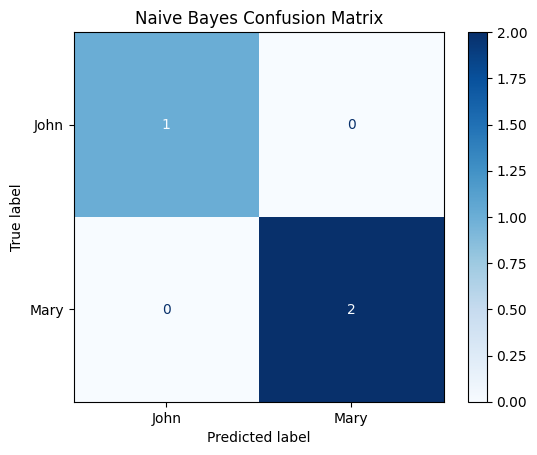


Predicted owner for lunchbox (Sandwich:1, Apple:1, Cookies:0): John


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes for continuous data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np # Import numpy as it's used later in the code

# 1. Create synthetic data for lunchboxes
# Features: Has_Sandwich, Has_Apple, Has_Cookies (1=Yes, 0=No)
# Target: Owner (John, Mary, Sarah)
data_nb = {
    'Has_Sandwich': [1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
    'Has_Apple':    [0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
    'Has_Cookies':  [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    'Owner':        ['John', 'Mary', 'Sarah', 'John', 'John', 'Mary', 'Mary', 'Sarah', 'John', 'Mary']
}
df_nb = pd.DataFrame(data_nb)

# Convert owner names to numerical labels
owner_mapping = {'John': 0, 'Mary': 1, 'Sarah': 2}
df_nb['Owner_Label'] = df_nb['Owner'].map(owner_mapping)

X_nb = df_nb[['Has_Sandwich', 'Has_Apple', 'Has_Cookies']]
y_nb = df_nb['Owner_Label']

# 2. Split data
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42)

# 3. Create Naive Bayes model (GaussianNB is suitable here)
model_nb = GaussianNB()

# 4. Train the model
model_nb.fit(X_train_nb, y_train_nb)

# 5. Make predictions
y_pred_nb = model_nb.predict(X_test_nb)

# 6. Evaluate
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("\nClassification Report:")

# Identify the unique labels present in the test set
unique_test_labels = np.unique(np.concatenate((y_test_nb, y_pred_nb)))
# Map these labels back to their original names for display
display_labels_nb = [name for label in unique_test_labels for name, idx in owner_mapping.items() if idx == label]


# Pass the list of all possible labels to the 'labels' parameter
# Use the filtered display_labels_nb for target_names as well
print(classification_report(y_test_nb, y_pred_nb, target_names=display_labels_nb, labels=unique_test_labels))

cm_nb = confusion_matrix(y_test_nb, y_pred_nb, labels=unique_test_labels) # Pass labels to confusion_matrix
# Also pass the display labels to the ConfusionMatrixDisplay
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=display_labels_nb)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Example prediction: A lunchbox with sandwich and apple
new_lunchbox = pd.DataFrame([[1, 1, 0]], columns=X_nb.columns)
predicted_owner_label = model_nb.predict(new_lunchbox)[0]
# Reverse mapping to get owner name
predicted_owner_name = [name for name, label in owner_mapping.items() if label == predicted_owner_label][0]
print(f"\nPredicted owner for lunchbox (Sandwich:1, Apple:1, Cookies:0): {predicted_owner_name}")

## 3. Support Vector Machines (SVM)
Concept: Finding the optimal boundary (line) to separate categories

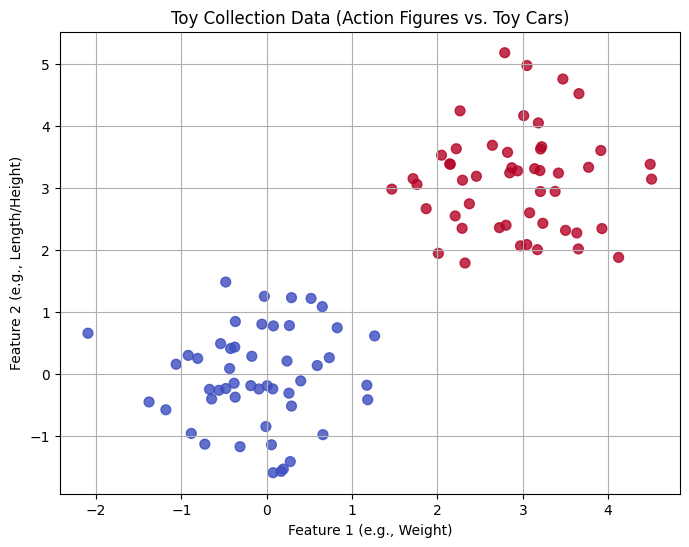

SVM Accuracy: 1.00


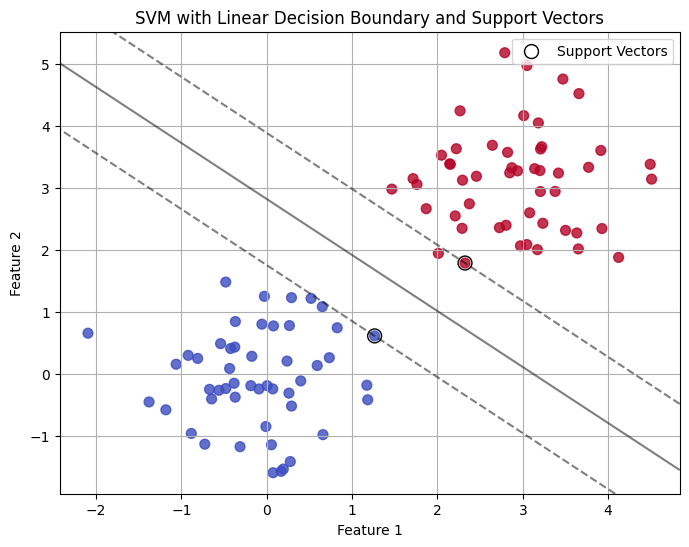


Prediction for new toy [1, 1]: Action Figure


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate synthetic data (toy collection: action figures vs. toy cars)
# We'll use 2 features for easy visualization
np.random.seed(42)
# Class 0: Action Figures (e.g., weight, height)
X_class0 = np.random.randn(50, 2) * 0.8 + [0, 0]
# Class 1: Toy Cars (e.g., weight, length)
X_class1 = np.random.randn(50, 2) * 0.8 + [3, 3]

X_svm = np.vstack((X_class0, X_class1))
y_svm = np.hstack((np.zeros(50), np.ones(50)))

# 2. Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, cmap='coolwarm', s=50, alpha=0.8)
plt.title("Toy Collection Data (Action Figures vs. Toy Cars)")
plt.xlabel("Feature 1 (e.g., Weight)")
plt.ylabel("Feature 2 (e.g., Length/Height)")
plt.grid(True)
plt.show()

# 3. Split data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

# 4. Create SVM model (C: regularization parameter, kernel: linear for simple boundary)
model_svm = SVC(kernel='linear', C=1.0, random_state=42)

# 5. Train the model
model_svm.fit(X_train_svm, y_train_svm)

# 6. Make predictions
y_pred_svm = model_svm.predict(X_test_svm)

# 7. Evaluate
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# 8. Visualize the decision boundary (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, cmap='coolwarm', s=50, alpha=0.8)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model_svm.support_vectors_[:, 0], model_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVM with Linear Decision Boundary and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Example prediction: A new toy with features [1, 1]
new_toy = np.array([[1, 1]])
predicted_class = model_svm.predict(new_toy)[0]
print(f"\nPrediction for new toy [1, 1]: {'Toy Car' if predicted_class == 1 else 'Action Figure'}")

# Neural Networks in Plain Words For Neural Networks, we'll use TensorFlow with Keras, which provides a high-level API.

## 1. Artificial Neural Networks (ANN)
Concept: A basic brain-like model for classification.

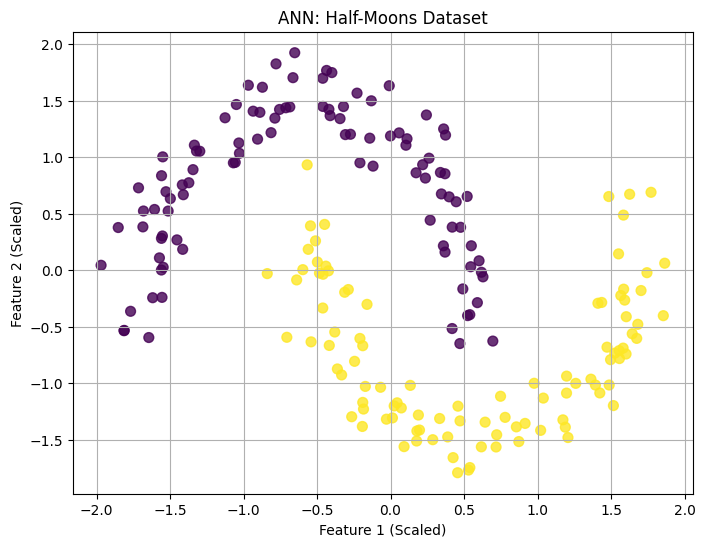

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training ANN Model...
Training Complete.
ANN Test Accuracy: 0.88
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



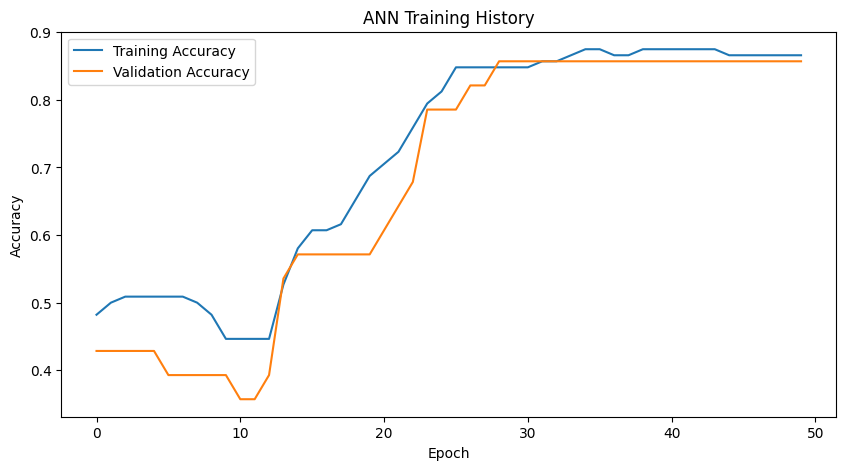

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


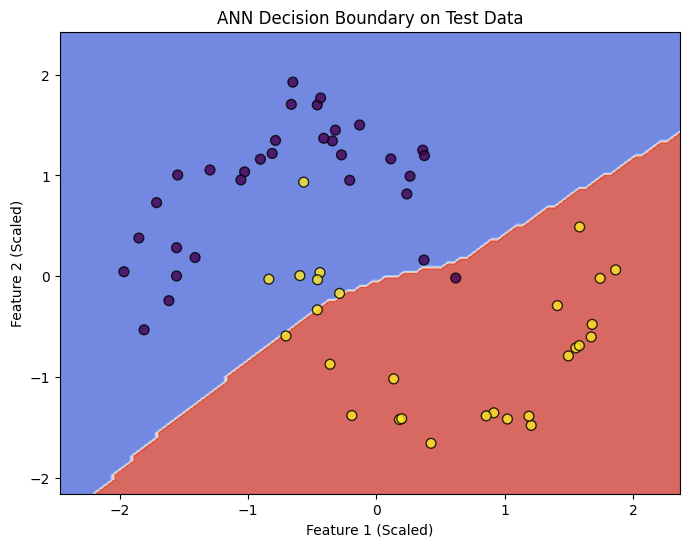

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Generate synthetic data (e.g., two half-moons for non-linear separation)
from sklearn.datasets import make_moons
X_ann, y_ann = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale data for better neural network training
scaler_ann = StandardScaler()
X_ann_scaled = scaler_ann.fit_transform(X_ann)

# 2. Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_ann_scaled[:, 0], X_ann_scaled[:, 1], c=y_ann, cmap='viridis', s=50, alpha=0.8)
plt.title("ANN: Half-Moons Dataset")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.grid(True)
plt.show()

# 3. Split data
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann_scaled, y_ann, test_size=0.3, random_state=42)

# 4. Create an ANN model using Keras
model_ann = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train_ann.shape[1],)), # Input layer + 1st hidden layer
    keras.layers.Dense(10, activation='relu'), # 2nd hidden layer
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 5. Compile the model
model_ann.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# 6. Train the model
print("\nTraining ANN Model...")
history_ann = model_ann.fit(X_train_ann, y_train_ann, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
print("Training Complete.")

# 7. Evaluate the model
loss_ann, accuracy_ann = model_ann.evaluate(X_test_ann, y_test_ann, verbose=0)
print(f"ANN Test Accuracy: {accuracy_ann:.2f}")

y_pred_proba_ann = model_ann.predict(X_test_ann)
y_pred_class_ann = (y_pred_proba_ann > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_ann, y_pred_class_ann))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot decision boundary (for 2D data)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict((np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    Z = (Z > 0.5).astype(int) # Convert probabilities to classes

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', alpha=0.8, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.show()

plot_decision_boundary(model_ann, X_test_ann, y_test_ann, "ANN Decision Boundary on Test Data")

## 2 Convolutional Neural Networks (CNN)
Concept: Excellent for image analysis (like zooming into a photo). We'll use the famous MNIST dataset (handwritten digits).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


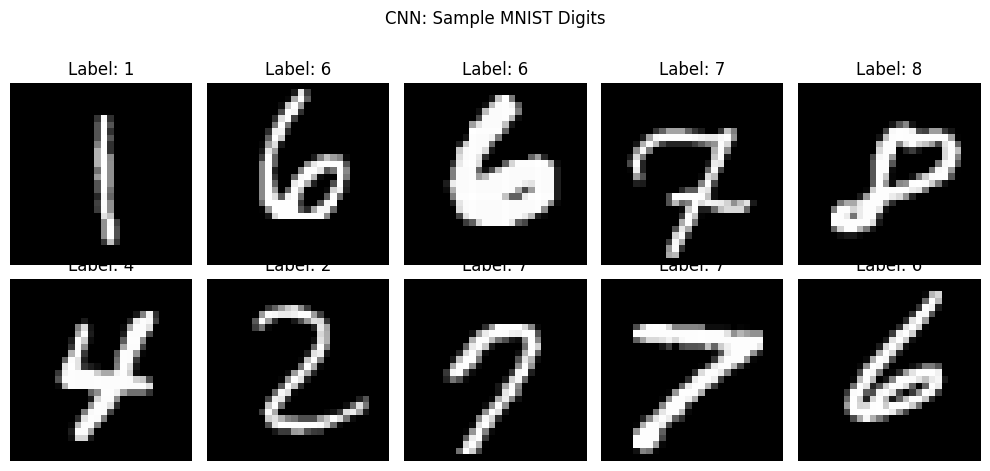

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN Model...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8766 - loss: 0.4212 - val_accuracy: 0.9830 - val_loss: 0.0607
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9835 - loss: 0.0559 - val_accuracy: 0.9847 - val_loss: 0.0493
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9877 - val_loss: 0.0423
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.9927 - loss: 0.0256 - val_accuracy: 0.9883 - val_loss: 0.0369
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9903 - val_loss: 0.0312
Training Complete.

CNN Test Accuracy: 0.99


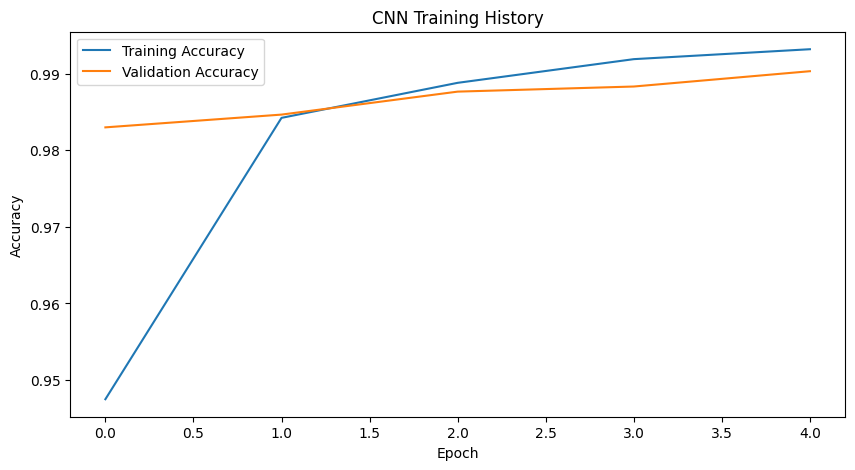

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 1. Load the MNIST dataset (handwritten digits)
# This dataset is built into Keras and is commonly used for CNN examples
(X_train_cnn_full, y_train_cnn_full), (X_test_cnn, y_test_cnn) = keras.datasets.mnist.load_data()

# Preprocess the data:
# - Normalize pixel values to be between 0 and 1
X_train_cnn_full = X_train_cnn_full / 255.0
X_test_cnn = X_test_cnn / 255.0

# - Add a channel dimension (for grayscale images, 1 channel)
# CNNs expect input in shape (batch, height, width, channels)
X_train_cnn_full = X_train_cnn_full[..., np.newaxis]
X_test_cnn = X_test_cnn[..., np.newaxis]

# Split training data into training and validation sets
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train_cnn_full, y_train_cnn_full, test_size=0.1, random_state=42
)

# 2. Visualize some example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_cnn[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train_cnn[i]}")
    plt.axis('off')
plt.suptitle("CNN: Sample MNIST Digits")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Create a CNN model
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer
    keras.layers.MaxPooling2D((2, 2)), # Pooling layer to reduce dimensions
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(), # Flatten output for dense layers
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Output layer for 10 digits
])

# 4. Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse for integer labels
                  metrics=['accuracy'])

model_cnn.summary() # Print model architecture

# 5. Train the model
print("\nTraining CNN Model...")
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=64,
                            validation_data=(X_val_cnn, y_val_cnn), verbose=1)
print("Training Complete.")

# 6. Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"\nCNN Test Accuracy: {accuracy_cnn:.2f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3 Long Short-Term Memory (LSTM)
Concept: Remembering what matters in sequences (like remembering key plot points in a story). We'll use a simple text classification example.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM Model...
Training Complete.

LSTM Test Accuracy: 0.33


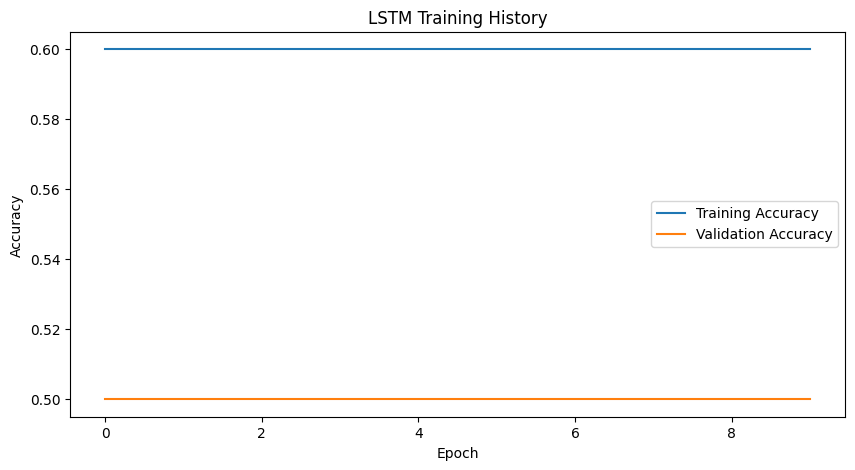

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step

Review: 'this movie was terrible'
Predicted Probability of Positive: 0.53
Predicted Sentiment: Positive


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. Generate synthetic sequential data (simple reviews)
texts = [
    "this movie was great and I loved it",
    "the plot was good but acting was bad",
    "horrible movie, absolutely hated it",
    "it was fantastic, highly recommend",
    "not good, boring and slow",
    "amazing film, a masterpiece",
    "dull and uninteresting",
    "loved the characters, so engaging",
    "terrible acting, poor story",
    "a must watch, truly wonderful"
]
labels = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1] # 1 for positive, 0 for negative

# 2. Preprocess text data for LSTM
# Tokenize words (convert words to numbers)
tokenizer = Tokenizer(num_words=100, oov_token="<unk>") # Max 100 unique words, handle unknown
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length (important for LSTMs)
maxlen = 10 # Max length of a sequence
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Convert to numpy arrays
X_lstm = np.array(padded_sequences)
y_lstm = np.array(labels)

# 3. Split data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# 4. Create an LSTM model
vocab_size = len(tokenizer.word_index) + 1 # +1 for <unk> token

model_lstm = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16, input_length=maxlen), # Embedding layer to convert word indices to dense vectors
    keras.layers.LSTM(32), # LSTM layer
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 5. Compile the model
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_lstm.summary()

# 6. Train the model
print("\nTraining LSTM Model...")
history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=2,
                              validation_split=0.2, verbose=0)
print("Training Complete.")

# 7. Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\nLSTM Test Accuracy: {accuracy_lstm:.2f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Example prediction: "this movie was terrible"
new_text = ["this movie was terrible"]
new_sequence = tokenizer.texts_to_sequences(new_text)
padded_new_sequence = pad_sequences(new_sequence, maxlen=maxlen, padding='post', truncating='post')

predicted_proba = model_lstm.predict(padded_new_sequence)[0][0]
predicted_sentiment = "Positive" if predicted_proba > 0.5 else "Negative"
print(f"\nReview: '{new_text[0]}'")
print(f"Predicted Probability of Positive: {predicted_proba:.2f}")
print(f"Predicted Sentiment: {predicted_sentiment}")

# Next-Level AI Techniques These concepts are more advanced and often involve larger datasets or more complex setups. I'll provide illustrative simplified examples where possible.

## 1 Transformers
Concept: Advanced sequence processing with attention. Full-scale Transformers (like BERT or GPT) are huge models. We'll show a very basic conceptual Transformer-like encoder structure for illustrative purposes, using Keras's MultiHeadSelfAttention layer.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 1. Create a dummy sequential input (like a simplified sentence or sequence of features)
# Imagine each number is a "word embedding" or a feature vector in a sequence
# (batch_size, sequence_length, embedding_dim)
input_sequence = np.random.rand(2, 5, 16) # 2 samples, 5 items in sequence, each item has 16 features

print("Input sequence shape:", input_sequence.shape)

# 2. Build a very simple Transformer Encoder block
# A full Transformer has multiple such blocks and often uses positional encoding
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs) # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm

        ffn_output = self.ffn(out1) # Feed-forward network
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

# Define parameters
embed_dim = 16  # Embedding size for each token
num_heads = 2   # Number of attention heads
ff_dim = 32     # Hidden layer size in feed forward network

transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

# Apply the transformer block to our input
#output_sequence = transformer_block(input_sequence)

output_sequence = transformer_block(input_sequence, training=False)

print("Output sequence shape (after one Transformer Block):", output_sequence.shape)
print("\nThis code demonstrates the core components of a Transformer (Multi-Head Attention and Feed-Forward Networks).")
print("Full Transformers involve many such blocks, positional encodings, and specific encoder-decoder architectures.")

Input sequence shape: (2, 5, 16)
Output sequence shape (after one Transformer Block): (2, 5, 16)

This code demonstrates the core components of a Transformer (Multi-Head Attention and Feed-Forward Networks).
Full Transformers involve many such blocks, positional encodings, and specific encoder-decoder architectures.


## 2 Generative Adversarial Networks (GANs)
Concept: Two networks competing (Artist vs. Teacher) to generate realistic data. GANs are complex to train and require substantial computational resources. I'll provide a very simplified (and often unstable) example for generating simple 2D points.

TensorFlow version: 2.18.0
Keras version: 3.8.0
NumPy version: 2.0.2
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


Starting GAN training TensorFlow/Keras!)...
Epoch 0/10000: D Loss = 1.4822, G Loss = 0.6855
Epoch 500/10000: D Loss = 0.9355, G Loss = 1.1834
Epoch 1000/10000: D Loss = 0.6870, G Loss = 1.6374
Epoch 1500/10000: D Loss = 0.3313, G Loss = 2.1054
Epoch 2000/10000: D Loss = 0.8542, G Loss = 1.4998
Epoch 2500/10000: D Loss = 0.4794, G Loss = 1.6994
Epoch 3000/10000: D Loss = 0.5625, G Loss = 1.7089
Epoch 3500/10000: D Loss = 0.4352, G Loss = 1.7737
Epoch 4000/10000: D Loss = 0.5369, G Loss = 1.8043
Epoch 4500/10000: D Loss = 0.6608, G Loss = 1.8126
Epoch 5000/10000: D Loss = 0.4654, G Loss = 1.8223
Epoch 5500/10000: D Loss = 0.5506, G Loss = 1.8023
Epoch 6000/10000: D Loss = 0.4522, G Loss = 1.8470
Epoch 6500/10000: D Loss = 0.5436, G Loss = 1.6976
Epoch 7000/10000: D Loss = 0.5695, G Loss = 1.9074
Epoch 7500/10000: D Loss = 0.5196, G Loss = 1.8848
Epoch 

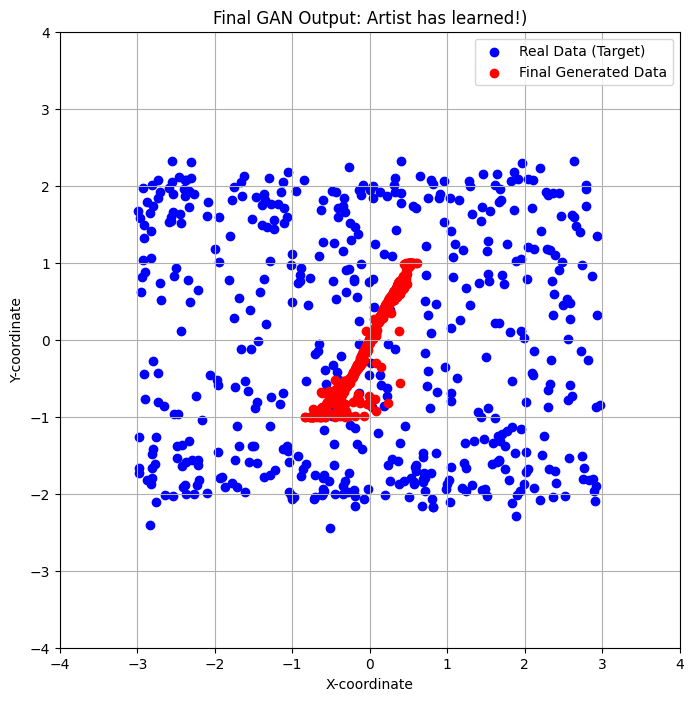

Generating animation...
Animation saved as gan_2d_animation_tf.gif


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import random
import datetime # For logging
import sys

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Python version: {sys.version}")
print('\n')


# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --- 1. Define the Real Data Distribution (The "Truth") ---
def get_real_samples(n_samples=100, data_type='sine'):
    """Generates real 2D data points."""
    if data_type == 'sine':
        x = np.random.uniform(-3, 3, n_samples).astype(np.float32).reshape(-1, 1)
        y = np.sin(x) * 2 + np.random.normal(0, 0.2, n_samples).astype(np.float32).reshape(-1, 1)
    elif data_type == 'circle':
        theta = np.random.uniform(0, 2 * np.pi, n_samples).astype(np.float32)
        r = 1 + np.random.normal(0, 0.1, n_samples).astype(np.float32) # Add some noise to radius
        x = (r * np.cos(theta)).reshape(-1, 1)
        y = (r * np.sin(theta)).reshape(-1, 1)
    else:
        raise ValueError("Invalid data_type. Choose 'sine' or 'circle'.")
    return tf.cast(np.hstack((x, y)), tf.float32)

# --- 2. Define the Neural Networks (Artist & Teacher) using Keras ---

# Generator (Artist)
# Input: latent_dim (noise), Output: 2D point (x, y)
latent_dim = 5
def make_generator_model():
    model = keras.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(2, activation='tanh') # Tanh outputs values between -1 and 1
    ], name='generator')
    return model

# Discriminator (Teacher)
# Input: 2D point (x, y), Output: probability of being real (0-1)
def make_discriminator_model():
    model = keras.Sequential([
        layers.Input(shape=(2,)), # Input is a 2D point
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Sigmoid for probability output
    ], name='discriminator')
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# --- 3. Define Loss Functions and Optimizers ---
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=False) # from_logits=False because sigmoid output is probabilities

def discriminator_loss(real_output, fake_output):
    # Discriminator wants to classify real as 1 and fake as 0
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    # Generator wants discriminator to classify fake as 1 (to fool it)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = keras.optimizers.Adam(learning_rate=0.001)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.001)

# --- 4. Training Parameters ---
epochs = 10000
batch_size = 64
display_interval = 500

# Store generated samples for visualization
generated_samples_history = []
discriminator_losses = []
generator_losses = []

# --- 5. Training Step Function (The Core of GAN training) ---

# Use tf.function for performance
@tf.function
def train_step(real_images):
    # 1. Train Discriminator
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)

    # Calculate gradients
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    # Apply gradients
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return disc_loss, gen_loss, generated_images


# --- 6. Visualization Setup ---
fig, ax = plt.subplots(figsize=(8, 8))
scatter_real = ax.scatter([], [], color='blue', label='Real Data (Target)')
scatter_fake = ax.scatter([], [], color='red', label='Generated Data (Artist Output)')
ax.set_title("GAN Training Progress (Artist vs. Teacher)")
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.close(fig) # Don't show the initial empty plot

def update_plot(frame):
    if not generated_samples_history:
        return scatter_real, scatter_fake

    # Get data for the current frame
    gen_data = generated_samples_history[frame]

    # Update scatter plots
    # We fetch real samples each time to ensure random sampling,
    # but the overall distribution remains constant.
    scatter_real.set_offsets(get_real_samples(n_samples=500, data_type='sine'))
    scatter_fake.set_offsets(gen_data)

    current_epoch = frame * display_interval
    if current_epoch < epochs:
        ax.set_title(f"GAN Training Progress (Artist vs. Teacher) - Epoch {current_epoch}/{epochs}\n"
                     f"D Loss: {discriminator_losses[frame]:.4f}, G Loss: {generator_losses[frame]:.4f}")
    else:
        ax.set_title(f"GAN Training Progress (Artist vs. Teacher) - Final State\n"
                     f"D Loss: {discriminator_losses[-1]:.4f}, G Loss: {generator_losses[-1]:.4f}")

    return scatter_real, scatter_fake

# --- 7. Training Loop ---
print("Starting GAN training TensorFlow/Keras!)...")
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"logs/gan_2d_points/{current_time}"
# Summary writers for TensorBoard (optional, but good for real projects)
# disc_summary_writer = tf.summary.create_file_writer(log_dir + "/discriminator_loss")
# gen_summary_writer = tf.summary.create_file_writer(log_dir + "/generator_loss")


for epoch in range(epochs):
    # Generate a batch of real samples
    real_samples_batch = get_real_samples(batch_size, data_type='sine')

    # Perform one training step
    d_loss, g_loss, latest_generated_samples = train_step(real_samples_batch)

    # --- Reporting and Visualization ---
    if epoch % display_interval == 0:
        print(f"Epoch {epoch}/{epochs}: D Loss = {d_loss:.4f}, G Loss = {g_loss:.4f}")
        generated_samples_history.append(latest_generated_samples.numpy()) # Convert tensor to numpy for plotting
        discriminator_losses.append(d_loss.numpy())
        generator_losses.append(g_loss.numpy())

        # Log to TensorBoard (if enabled)
        # with disc_summary_writer.as_default():
        #     tf.summary.scalar('discriminator_loss', d_loss, step=epoch)
        # with gen_summary_writer.as_default():
        #     tf.summary.scalar('generator_loss', g_loss, step=epoch)


print("\nGAN training complete.")

# --- Final Visualization ---
final_noise = tf.random.normal([500, latent_dim])
final_generated_samples = generator(final_noise, training=False).numpy() # Set training=False for inference

plt.figure(figsize=(8, 8))
plt.scatter(get_real_samples(500, data_type='sine')[:, 0], get_real_samples(500, data_type='sine')[:, 1], color='blue', label='Real Data (Target)')
plt.scatter(final_generated_samples[:, 0], final_generated_samples[:, 1], color='red', label='Final Generated Data')
plt.title("Final GAN Output: Artist has learned!)")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.show()

# Create animation if history is available
if generated_samples_history:
    print("Generating animation...")
    ani = animation.FuncAnimation(fig, update_plot, frames=len(generated_samples_history),
                                  blit=True, interval=display_interval / 100 * 1000) # Interval in ms

    try:
        # Saving as GIF might be easier for local execution if ffmpeg isn't configured
        # Requires 'pillow' for GIF or 'ffmpeg' for MP4
        ani.save('gan_2d_animation_tf.gif', writer='pillow', fps=10)
        print("Animation saved as gan_2d_animation_tf.gif")
    except Exception as e:
        print(f"Could not save animation (requires 'pillow' for GIF or 'ffmpeg' for MP4). Error: {e}")
        print("Try running this in a Jupyter Notebook/Colab and using `HTML(ani.to_jshtml())`")

## 3 Reinforcement Learning (RL)
Concept: Agent learns by interacting with an environment and receiving rewards. This is usually done with libraries like Gym (now Gymnasium). A full RL agent is too complex for a simple inline example, but I can show you how to set up a basic environment and interact with it, hinting at the learning process.

In [13]:
import gymnasium as gym
import numpy as np

# You might need to install gymnasium: pip install gymnasium
# For rendering, depending on your OS, you might also need: pip install 'gymnasium[classic-control]'

# 1. Define a simple environment (e.g., CartPole - balancing a pole on a cart)
# This is a classic RL example, akin to our flight planning agent learning to maneuver.
env = gym.make("CartPole-v1", render_mode="human") # 'human' for rendering, 'rgb_array' for capturing frames

# 2. Explore the environment's action and observation spaces
# Observation space: What the agent "sees" (e.g., position, velocity, angle, angular velocity of pole)
# Action space: What actions the agent can take (e.g., push cart left or right)
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}") # Discrete(2) means 2 possible actions: 0 or 1

# 3. Simulate a random agent's interaction (without learning)
# This shows the "trial and error" part without the "learning" part
print("\nSimulating a random agent's interaction...")
observation, info = env.reset() # Reset the environment to its initial state
terminated = False
truncated = False
total_reward = 0

for _ in range(100): # Run for up to 100 steps
    action = env.action_space.sample() # Take a random action (push left or right)
    observation, reward, terminated, truncated, info = env.step(action) # Take a step in the environment

    total_reward += reward

    # env.render() # Uncomment to see the visualization

    if terminated or truncated:
        print(f"Episode finished after {_ + 1} steps. Total Reward: {total_reward}")
        break
env.close()

print("\n--- How Reinforcement Learning Works ---")
print("An RL agent would repeatedly interact with this environment, collecting observations, taking actions,")
print("and receiving rewards. Over many episodes, it would learn a 'policy' - a strategy for selecting actions")
print("that maximizes its total accumulated reward (e.g., balancing the pole for as long as possible).")
print("This learning involves algorithms like Q-learning, Policy Gradients, or Actor-Critic methods.")
print("This is analogous to a flight planning AI learning to navigate optimal routes by receiving rewards for safe, efficient flights and penalties for issues.")

Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)

Simulating a random agent's interaction...
Episode finished after 13 steps. Total Reward: 13.0

--- How Reinforcement Learning Works ---
An RL agent would repeatedly interact with this environment, collecting observations, taking actions,
and receiving rewards. Over many episodes, it would learn a 'policy' - a strategy for selecting actions
that maximizes its total accumulated reward (e.g., balancing the pole for as long as possible).
This learning involves algorithms like Q-learning, Policy Gradients, or Actor-Critic methods.
This is analogous to a flight planning AI learning to navigate optimal routes by receiving rewards for safe, efficient flights and penalties for issues.


# Bonus Concepts

## 1 Principal Component Analysis (PCA)
Concept: Reducing dimensions while preserving variance (flattening 3D LEGO models).

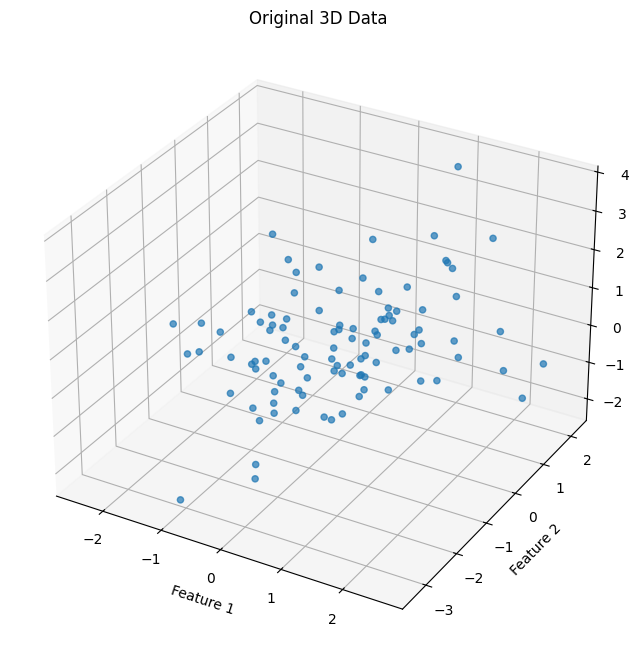

Original data shape: (100, 3)
Transformed data shape (2D): (100, 2)
Explained Variance Ratio by components: [0.59936187 0.27642874]
Total Explained Variance: 0.88


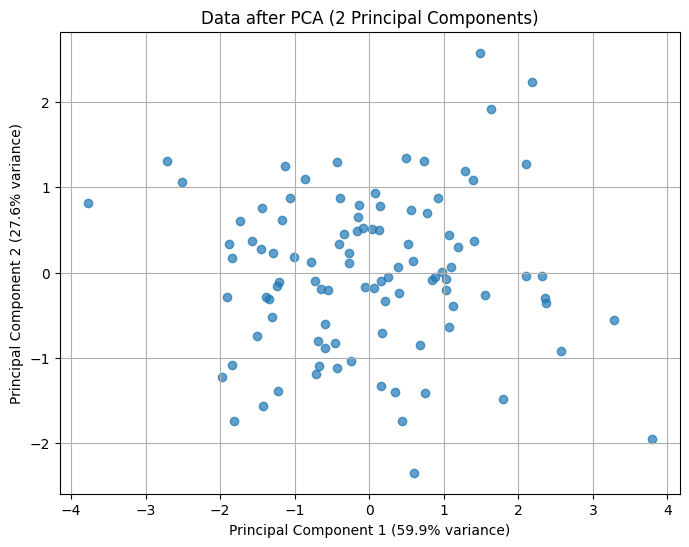

Reconstructed data shape: (100, 3)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic 3D data (e.g., a stretched blob)
np.random.seed(42)
# Data points clustered around a line in 3D
X_pca = np.random.randn(100, 3) # Random 3D points
# Stretch along a specific direction (principal component)
transformation_matrix = np.array([[3, 0.5, 0.2],
                                  [0.5, 1, 0.3],
                                  [0.2, 0.3, 0.8]])
X_pca = X_pca @ transformation_matrix

# Scale the data (important for PCA)
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# 2. Visualize the original 3D data (optional, but helps understanding)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], X_pca_scaled[:, 2], alpha=0.7)
ax.set_title("Original 3D Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

# 3. Create PCA model (reduce to 2 components)
pca = PCA(n_components=2)

# 4. Fit PCA and transform the data
X_pca_2d = pca.fit_transform(X_pca_scaled)

print(f"Original data shape: {X_pca_scaled.shape}")
print(f"Transformed data shape (2D): {X_pca_2d.shape}")
print(f"Explained Variance Ratio by components: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {pca.explained_variance_ratio_.sum():.2f}")

# 5. Visualize the 2D projected data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.7)
plt.title("Data after PCA (2 Principal Components)")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.show()

# Example: Reconstruct data (approximate original)
X_pca_reconstructed = pca.inverse_transform(X_pca_2d)
print(f"Reconstructed data shape: {X_pca_reconstructed.shape}")

## 2 Autoencoders
Concept: Learning compressed representations (packing toy boxes).

Original image shape: (60000, 784)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 32)             │       104,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)


Training Autoencoder Model...
Training Complete.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


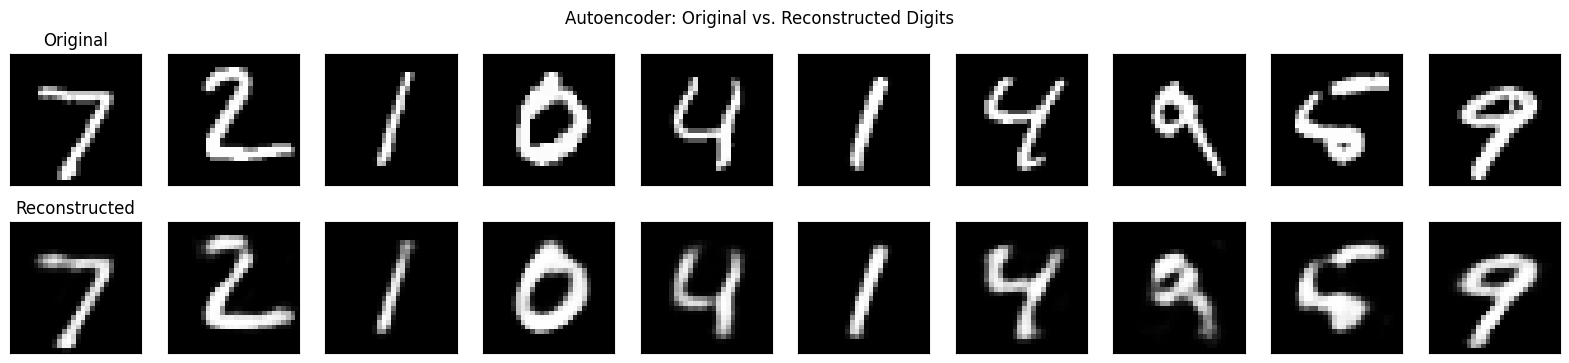

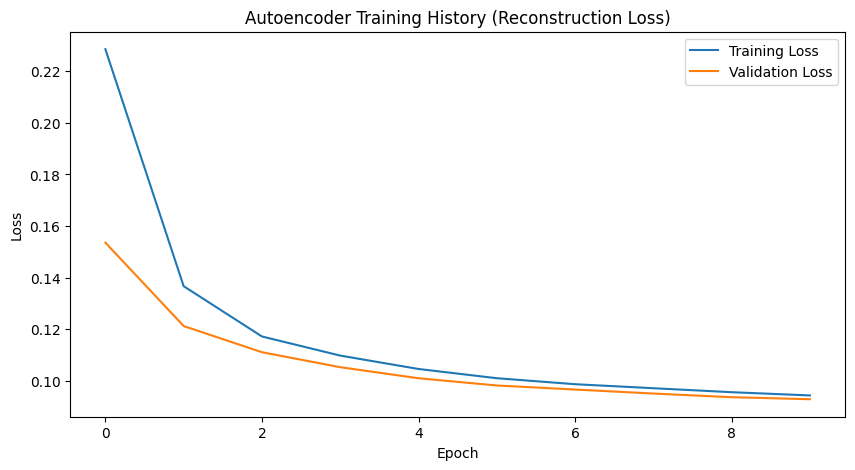

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load MNIST data (or any image data) for demonstration
# We'll use a subset for faster training
(X_train_ae, _), (X_test_ae, _) = keras.datasets.mnist.load_data()

# Preprocess: Normalize and flatten images
X_train_ae = X_train_ae.astype('float32') / 255.0
X_test_ae = X_test_ae.astype('float32') / 255.0

# Flatten images (28x28 = 784 pixels)
X_train_ae = X_train_ae.reshape((len(X_train_ae), np.prod(X_train_ae.shape[1:])))
X_test_ae = X_test_ae.reshape((len(X_test_ae), np.prod(X_test_ae.shape[1:])))

print(f"Original image shape: {X_train_ae.shape}")

# 2. Define the Autoencoder model
input_dim = X_train_ae.shape[1] # 784
encoding_dim = 32 # This is our compressed representation (like the packed toy box)

# Encoder part
encoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(encoding_dim, activation='relu') # The bottleneck, the 'encoded' representation
])

# Decoder part
decoder = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(encoding_dim,)),
    layers.Dense(input_dim, activation='sigmoid') # Output the reconstructed image (pixels 0-1)
])

# Autoencoder combines encoder and decoder
autoencoder = keras.Sequential([encoder, decoder])

# 3. Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Good for pixel values (0-1)

autoencoder.summary()

# 4. Train the autoencoder
print("\nTraining Autoencoder Model...")
history_ae = autoencoder.fit(X_train_ae, X_train_ae, # Input and target are the same (reconstruct input)
                             epochs=10,
                             batch_size=256,
                             shuffle=True,
                             validation_data=(X_test_ae, X_test_ae),
                             verbose=0)
print("Training Complete.")

# 5. Evaluate and visualize reconstruction
encoded_imgs = encoder.predict(X_test_ae)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_ae[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original")

    # Reconstructed Image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Reconstructed")
plt.suptitle("Autoencoder: Original vs. Reconstructed Digits")
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history_ae.history['loss'], label='Training Loss')
plt.plot(history_ae.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History (Reconstruction Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3 Gradient Boosting (e.g., XGBoost, LightGBM)
Concept: Iteratively improving predictions by correcting errors. XGBoost is a highly popular and efficient implementation.



In [16]:
!pip install --upgrade xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.6 MB/s eta 0:00:00



Training XGBoost Model...
Training Complete.

XGBoost Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       137
           1       0.67      0.31      0.42        13

    accuracy                           0.93       150
   macro avg       0.80      0.65      0.69       150
weighted avg       0.91      0.93      0.91       150



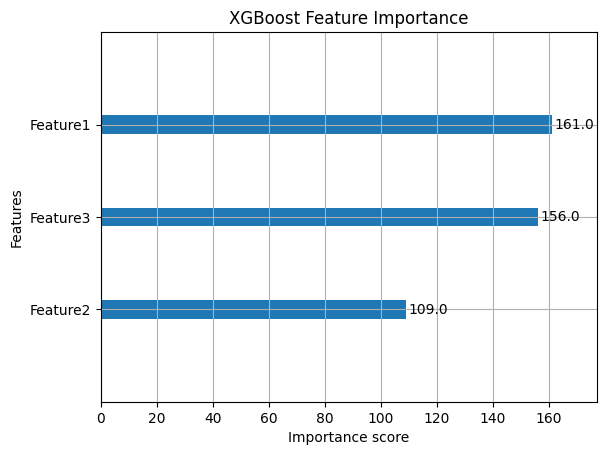


Prediction for new data point (Feature1:4, Feature2:8, Feature3:0.5): Class 0


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb # You might need to 'pip install xgboost'
import matplotlib.pyplot as plt
import numpy as np # Import numpy as it's used later in the code
from xgboost.callback import EarlyStopping # Import the EarlyStopping callback

# 1. Generate a synthetic dataset for classification (similar to Random Forest)
np.random.seed(42)
data_size_gb = 500
df_gb = pd.DataFrame({
    'Feature1': np.random.normal(5, 2, data_size_gb),
    'Feature2': np.random.normal(10, 3, data_size_gb),
    'Feature3': np.random.normal(0, 1, data_size_gb),
    'Target': np.random.randint(0, 2, data_size_gb) # Binary classification
})

# Make 'Target' a bit dependent on features for learning
df_gb['Target'] = ((df_gb['Feature1'] * 0.5 + df_gb['Feature2'] * 0.2 + df_gb['Feature3'] * 0.8 + np.random.randn(data_size_gb)) > 7).astype(int)

X_gb = df_gb[['Feature1', 'Feature2', 'Feature3']]
y_gb = df_gb['Target']

# 2. Split data
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.3, random_state=42)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    rounds=10,        # Number of rounds without improvement to trigger early stopping
    min_delta=0.0,    # Minimum change to qualify as an improvement
    # verbose=False,    # Set to True to see messages about early stopping - REMOVED
    # monitor='eval-logloss' # Metric to monitor (depends on eval_metric)
)

# 3. Create XGBoost Classifier model
# Parameters like n_estimators (number of trees), learning_rate, max_depth
# Pass the early_stopping object within the 'callbacks' list in the constructor
model_xgb = xgb.XGBClassifier(objective='binary:logistic', # For binary classification
                              n_estimators=100,            # Number of boosting rounds (trees)
                              learning_rate=0.1,           # Step size shrinkage to prevent overfitting
                              eval_metric='logloss',       # Evaluation metric during training
                              random_state=42,
                              callbacks=[early_stopping]) # Use the callbacks argument here

# 4. Train the model
print("\nTraining XGBoost Model...")
# The eval_set argument is still used in the fit method
model_xgb.fit(X_train_gb, y_train_gb,
              eval_set=[(X_test_gb, y_test_gb)], # Monitor performance on test set
              verbose=False) # Set to True for verbose output during fit
print("Training Complete.")

# 5. Make predictions
y_pred_gb = model_xgb.predict(X_test_gb)

# 6. Evaluate
accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
print(f"\nXGBoost Accuracy: {accuracy_gb:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_gb, y_pred_gb))

# Plot feature importance
xgb.plot_importance(model_xgb)
plt.title("XGBoost Feature Importance")
plt.show()

# Example prediction: New data point
new_data_point = pd.DataFrame([[4, 8, 0.5]], columns=X_gb.columns)
predicted_class_gb = model_xgb.predict(new_data_point)[0]
print(f"\nPrediction for new data point (Feature1:4, Feature2:8, Feature3:0.5): {'Class 1' if predicted_class_gb == 1 else 'Class 0'}")